<h2 style="text-align:center;font-size:200%;;">Change Detection & Forecasting in Smart Home</h2>
<h3  style="text-align:center;">Keywords : <span class="label label-success">Time Series Analysis</span> <span class="label label-success">IoT</span> <span class="label label-success">Anomaly Detection</span> <span class="label label-success">Model Comparison</span> <span class="label label-success">Model Interpretability</span></h3>

# Table of Contents<a id='top'></a>
>1. [Overview](#1.-Overview)  
>    * [Project Detail](#Project-Detail)
>    * [Goal of this notebook](#Goal-of-this-notebook)
>1. [Import libraries](#2.-Import-libraries)
>1. [Load the dataset](#3.-Load-the-dataset)
>1. [Pre-processing](#4.-Pre-processing)
>    * [Drop NAs](#Drop-NAs)
>    * [Invalid Rows](#Invalid-Rows)
>    * [Datetime information](#Datetime-information)
>    * [Timing information](#Timing-information)
>    * [Removing Duplicate Columns](#Removing-Duplicate-Columns)
>1. [EDA](#5.-EDA)  
>    * [Basic Analysis](#Basic-Analysis)
>        * [House Appliances](#House-Appliances)
>        * [Weather Information](#Weather-Information)
>    * [Time Series Analysis](#Time-Series-Analysis)
>        * [House Appliances Time-Series](#House-Appliances-Time-Series)
>        * [Weather Time-Series](#Weather-Time-Series)
>    * [Correlation Analysis](#Correlation-Analysis)
>1. [Modeling](#6.-Modeling)
>    * [Case1. Detect Changes in Energy Consumption](#Case1.-Detect-Changes-in-Energy-Consumption)
>        * [Model1. ChangeFinder](#Model1.-ChangeFinder)
>    * [Case2. Predict Future Energy Consumption](#Case2.-Predict-Future-Energy-Consumption)
>        * [Model1. VAR](#Model1.-VAR)
>        * [Model2. Prophet](#Model2.-Prophet)
>        * [Model3. LightGBM Regressor](#Model3.-LightGBM-Regressor)
>        * [Model Comparison](#Model-Comparison)
>1. [Conclusion](#7.-Conclusion)
>1. [References](#8.-References)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 1. Overview
## Project Detail
>In [this Dataset](https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information), energy data from house appliances and weather information are provided.    
>
>House appliances connected to and retirieved from smartmeter is below:
>* Amount of house energy consumption
>* Dishwasher
>* Furnace 
>* Home office
>* Fridge 
>* Wine cellarc  
>* Garage door  
>* Kitchen  
>* Barn  
>* Well  
>* Microwave  
>* Living room  
>* Solar power generation
>
>By using this dataset, we can understand the relationship between energy consumption by appliances and time period, or detect anomalous usage of appliances, or clarify the relationship between weather information and energy generated by solar power.

## Goal of this notebook
>* Practice data pre-processing technique
>* Practice EDA technique to deal with time-series data
>* Practice visualising technique
>* Practice anomaly detection modeling technique
>    * ChangeFinder
>* Practice time-series modeling technique for predicting
>    * VAR
>    * Prophet
>    * LightGBM Regressor
>* Practice improving the interpretability of the model

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 2. Import libraries

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
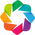

In [1]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from matplotlib import pyplot as plt
import seaborn as sns
import os
# !pip install changefinder
import changefinder
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
# from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import shap
shap.initjs()
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from IPython.display import HTML, display

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 3. Load the dataset

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("input/HomeC.csv",low_memory=False)
print(f'HomeC.csv : {df.shape}')
df.head(3)

HomeC.csv : (503911, 32)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
# print(df.info)

### Weather information understanding
>In order to utilize weather information data, we need to understand what each weather information means actually.  
>**Source notebook: [smart_home_data_processing___weather_vs_energy](https://www.kaggle.com/malekzadeh/smart-home-data-processing-weather-vs-energy)**
>* **temperature**
>    * physical quantity expressing hot and cold
>* **humidity**
>    * concentration of water vapour present in air
>* **visibility**
>    * meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value
>* **apparentTemperature**
>    * temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed
>* **pressure**
>    * Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
>* **windSpeed**
>    * fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature
>* **cloudCover**
>    * fraction of the sky obscured by clouds when observed from a particular location
>* **windBearing**
>    * In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
>* **dewPoint**
>    * the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form
>* **precipProbability**
>    * measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location
>* **precipIntensity**
>    * measure of the amount of rain that falls over time

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 4. Pre-processing

In [5]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

>remove unit(kW) from dataset column names.

In [6]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]

In [7]:
# # Find non-float columns
# non_float_cols = df.select_dtypes(exclude=['float64']).columns
# print("Non-float columns:", non_float_cols)

# # If these columns are indeed of object (string) type or boolean, we can encode them to float.
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}  # To store label encoders for potential future inverse transformations

# for col in non_float_cols:
#     # If the column data type is object (string), we encode it
#     if df[col].dtype == 'object':
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
#         label_encoders[col] = le
#     # If the column data type is bool, we convert it to int
#     elif df[col].dtype == 'bool':
#         df[col] = df[col].astype(int)

# # Verify that all columns are now float or int
# print(df.dtypes)

# non_float_cols = df.select_dtypes(exclude=['float64']).columns
# print("Non-float columns:", non_float_cols)



>There are multiple columns in Furnance and Kitchen. To make it simple, I aggregated them into new column by summing them up.

In [8]:
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

## Drop NAs

>There is a row that contains NaN.

In [9]:
df[df.isnull().any(axis=1)]

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


>Last row contains NaN, so we remove it from data.

In [10]:
df = df[0:-1]

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Invalid Rows

>There are invalid values in cloudCover column because it must be float64-type but it is object-type.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          503910 non-null  float64
 15  humidity         

>'cloudCover' value was found in the column(58 rows). Maybe this is a data collection mistake.

In [12]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [13]:
df[df['cloudCover']=='cloudCover'].shape

(58, 27)

>So let's replace these invalid values with the next valid value.

In [14]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.


## Datetime information

>After converting unixtimestamp, I realized the time-step is in increments of seconds though the data was collected with time-span of 1 minute.

In [15]:
pd.to_datetime(df['time'], unit='s').head(3)

The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.


0   2016-01-01 05:00:48
1   2016-01-01 05:00:48
2   2016-01-01 05:00:48
Name: time, dtype: datetime64[ns]

>We need to create new daterange in increments of minutes.

In [16]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


>To utilize datetime information such as year, month and day in EDA and modeling phase, we need to extract them from time column.

In [17]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2


<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Timing information
><div class="alert alert-success" role="alert">
>Hour variable can be broken into Night, Morning, Afternoon and Evening based on its number.
><ul>
>    <li><b>Night</b> : 22:00 - 23:59 / 00:00 - 03:59</li>
>    <li><b>Morning</b> : 04:00 - 11:59</li>
>    <li><b>Afternoon</b> : 12:00 - 16:59</li>
>    <li><b>Evening</b> : 17:00 - 21:59</li>
></ul>
>We can create timing variable based on hour variable.
></div>

In [18]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [19]:
df['timing'] = df['hour'].apply(hours2timing)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute,timing
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.082617,0.000567,2016,1,1,Friday,53,5,0,Morning
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.084533,0.000567,2016,1,1,Friday,53,5,1,Morning
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.083017,0.000617,2016,1,1,Friday,53,5,2,Morning


## Removing Duplicate Columns

>According to dataset information, there may be some similar columns.

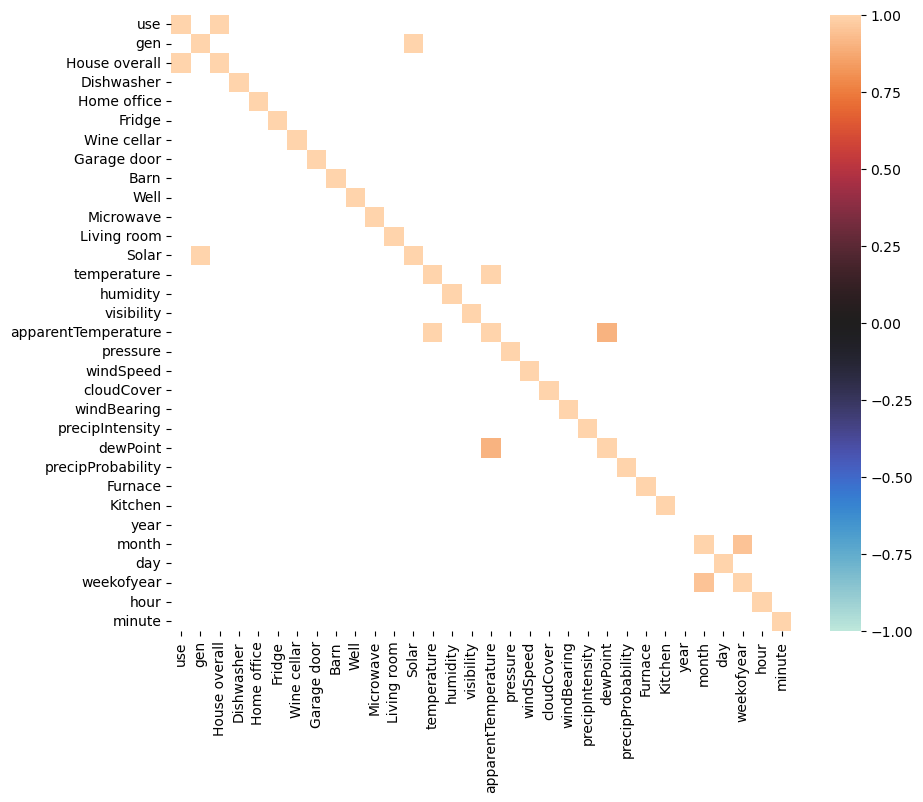

In [20]:
# fig = plt.subplots(figsize=(10, 8)) 
# corr = df.corr()
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
# sns.heatmap(corr[corr>0.9], vmax=1, vmin=-1, center=0)
# plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr[corr > 0.9], vmax=1, vmin=-1, center=0, ax=ax)
plt.show()

>'use' - 'House overall' and 'gen' and 'Solar' columns' correlation coefficient is almost over 0.95, so we need to put these columns together as a new columns.

In [21]:
df['use_HO'] = df['use']
df['gen_Sol'] = df['gen']
df.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)
df.head(3)

,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,year,month,day,weekday,weekofyear,hour,minute,timing,use_HO,gen_Sol
0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,2016,1,1,Friday,53,5,0,Morning,0.932833,0.003483
1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,2016,1,1,Friday,53,5,1,Morning,0.934333,0.003467
2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,2016,1,1,Friday,53,5,2,Morning,0.931817,0.003467


In [22]:
print(df.info())
# Export df to a CSV file
df.to_csv("cleaned_HomeC.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 503910 non-null  datetime64[ns]
 1   Dishwasher           503910 non-null  float64       
 2   Home office          503910 non-null  float64       
 3   Fridge               503910 non-null  float64       
 4   Wine cellar          503910 non-null  float64       
 5   Garage door          503910 non-null  float64       
 6   Barn                 503910 non-null  float64       
 7   Well                 503910 non-null  float64       
 8   Microwave            503910 non-null  float64       
 9   Living room          503910 non-null  float64       
 10  temperature          503910 non-null  float64       
 11  humidity             503910 non-null  float64       
 12  visibility           503910 non-null  float64       
 13  apparentTemper

In [23]:
df.columns

Index(['time', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
       'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'Furnace', 'Kitchen', 'year', 'month',
       'day', 'weekday', 'weekofyear', 'hour', 'minute', 'timing', 'use_HO',
       'gen_Sol'],
      dtype='object')

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 5. EDA

## Basic Analysis

### House Appliances

In [24]:
use = hv.Distribution(df['use_HO']).opts(title="Total Energy Consumption Distribution", color="red")
gen = hv.Distribution(df['gen_Sol']).opts(title="Total Energy Generation Distribution", color="blue")
(use + gen).opts(opts.Distribution(xlabel="Energy Consumption", ylabel="Density", xformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True))

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


:Layout
   .Distribution.I  :Distribution   [use_HO]   (Density)
   .Distribution.II :Distribution   [gen_Sol]   (Density)

In [25]:
dw = hv.Distribution(df[df['Dishwasher']<1.5]['Dishwasher'],label="Dishwasher").opts(color="red")
ho = hv.Distribution(df[df['Home office']<1.5]['Home office'],label="Home office").opts(color="blue")
fr = hv.Distribution(df[df['Fridge']<1.5]['Fridge'],label="Fridge Distribution").opts(color="orange")
wc = hv.Distribution(df[df['Wine cellar']<1.5]['Wine cellar'],label="Wine cellar").opts(color="green")
gd = hv.Distribution(df[df['Garage door']<1.5]['Garage door'],label="Garage door").opts(color="purple")
ba = hv.Distribution(df[df['Barn']<1.5]['Barn'],label="Barn").opts(color="grey")
we = hv.Distribution(df[df['Well']<1.5]['Well'],label="Well").opts(color="pink")
mcr = hv.Distribution(df[df['Microwave']<1.5]['Microwave'],label="Microwave").opts(color="yellow")
lr = hv.Distribution(df[df['Living room']<1.5]['Living room'],label="Living room").opts(color="brown")
fu = hv.Distribution(df[df['Furnace']<1.5]['Furnace'],label="Furnace").opts(color="skyblue")
ki = hv.Distribution(df[df['Kitchen']<1.5]['Kitchen'],label="Kitchen").opts(color="lightgreen")

(dw * ho * fr * wc * gd * ba * we * mcr * lr * fu * ki).opts(opts.Distribution(xlabel="Energy Consumption", ylabel="Density", xformatter='%.1fkw',title='Energy Consumption of Appliances Distribution', \
                                                                               width=800, height=350,tools=['hover'],show_grid=True))

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


:Overlay
   .Distribution.Dishwasher          :Distribution   [Dishwasher]   (Density)
   .Distribution.Home_office         :Distribution   [Home office]   (Density)
   .Distribution.Fridge_Distribution :Distribution   [Fridge]   (Density)
   .Distribution.Wine_cellar         :Distribution   [Wine cellar]   (Density)
   .Distribution.Garage_door         :Distribution   [Garage door]   (Density)
   .Distribution.Barn                :Distribution   [Barn]   (Density)
   .Distribution.Well                :Distribution   [Well]   (Density)
   .Distribution.Microwave           :Distribution   [Microwave]   (Density)
   .Distribution.Living_room         :Distribution   [Living room]   (Density)
   .Distribution.Furnace             :Distribution   [Furnace]   (Density)
   .Distribution.Kitchen             :Distribution   [Kitchen]   (Density)

### Weather Information

In [26]:
temp = hv.Distribution(df['temperature'],label="temperature").opts(color="red")
apTemp = hv.Distribution(df['apparentTemperature'],label="apparentTemperature").opts(color="orange")
temps = (temp * apTemp).opts(opts.Distribution(title='Temperature Distribution')).opts(legend_position='top',legend_cols=2)
hmd = hv.Distribution(df['humidity']).opts(color="yellow", title='Humidity Distribution')
vis = hv.Distribution(df['visibility']).opts(color="blue", title='Visibility Distribution')
prs = hv.Distribution(df['pressure']).opts(color="green", title='Pressure Distribution')
wnd = hv.Distribution(df['windSpeed']).opts(color="purple", title='WindSpeed Distribution')
cld = hv.Distribution(df['cloudCover']).opts(color="grey", title='CloudCover Distribution')
prc = hv.Distribution(df['precipIntensity']).opts(color="skyblue", title='PrecipIntensity Distribution')
dew = hv.Distribution(df['dewPoint']).opts(color="lightgreen", title='DewPoint Distribution')

(temps + hmd + vis + prs + wnd + cld + prc + dew).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=400, height=300,tools=['hover'],show_grid=True)).cols(4)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

:Layout
   .Overlay.I        :Overlay
      .Distribution.Temperature         :Distribution   [temperature]   (Density)
      .Distribution.ApparentTemperature :Distribution   [apparentTemperature]   (Density)
   .Distribution.I   :Distribution   [humidity]   (Density)
   .Distribution.II  :Distribution   [visibility]   (Density)
   .Distribution.III :Distribution   [pressure]   (Density)
   .Distribution.IV  :Distribution   [windSpeed]   (Density)
   .Distribution.V   :Distribution   [cloudCover]   (Density)
   .Distribution.VI  :Distribution   [precipIntensity]   (Density)
   .Distribution.VII :Distribution   [dewPoint]   (Density)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Time Series Analysis

>util functions

In [27]:
def groupByMonth(col):
    return df[[col,'month']].groupby('month').agg({col:['mean']})[col]

In [28]:
def groupByWeekday(col):
    weekdayDf = df.groupby('weekday').agg({col:['mean']})
    weekdayDf.columns = [f"{i[0]}_{i[1]}" for i in weekdayDf.columns]
    weekdayDf['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekdayDf.index]
    weekdayDf.sort_values('week_num', inplace=True)
    weekdayDf.drop('week_num', axis=1, inplace=True)
    return weekdayDf

In [29]:
def groupByTiming(col):
    timingDf = df.groupby('timing').agg({col:['mean']})
    timingDf.columns = [f"{i[0]}_{i[1]}" for i in timingDf.columns]
    timingDf['timing_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in timingDf.index]
    timingDf.sort_values('timing_num', inplace=True)
    timingDf.drop('timing_num', axis=1, inplace=True)
    return timingDf

### House Appliances Time-Series
><div class="alert alert-success" role="alert">
><ul>
><li>Since there are many data points, I took the average value for each day.</li>
><li>Eneregy consumption peaks from <b>July to September</b></li>
><li>Eneregy generation doesn't have significant peaks, but gradually rises from <b>January to July</b> and then slowly declines.</li>    
></ul>
></div

In [30]:
df = df.set_index(df['time'])
use = hv.Curve(df['use_HO'].resample('D').mean()).opts(title="Total Energy Consumption Time-Series by Day", color="red", ylabel="Energy Consumption")
gen = hv.Curve(df['gen_Sol'].resample('D').mean()).opts(title="Total Energy Generation Time-Series by Day", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Day", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':11}))

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


:Layout
   .Curve.I  :Curve   [time]   (use_HO)
   .Curve.II :Curve   [time]   (gen_Sol)

In [31]:
use = hv.Curve(groupByMonth('use_HO')).opts(title="Total Energy Consumption Time-Series by Month", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByMonth('gen_Sol')).opts(title="Total Energy Generation Time-Series by Month", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Month", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':10})).opts(shared_axes=False)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


:Layout
   .Curve.I  :Curve   [month]   (mean)
   .Curve.II :Curve   [month]   (mean)

><div class="alert alert-success" role="alert">
><ul>
><li>Intuitively, it is thought that there is not a weekly trend in enegry consumption and generation.</li>
><li>In reality, there seems to be a slight trend, but the change in value is negligible and can be ignored.</li>
></ul>
></div>

In [32]:
use = hv.Curve(groupByWeekday('use_HO')).opts(title="Total Energy Consumption Time-Series by Weekday", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByWeekday('gen_Sol')).opts(title="Total Energy Generation Time-Series by Weekday", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Weekday", yformatter='%.2fkw', width=400, height=300,tools=['hover'],show_grid=True, xrotation=20,fontsize={'title':10})).opts(shared_axes=False)

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating ke

:Layout
   .Curve.I  :Curve   [weekday]   (use_HO_mean)
   .Curve.II :Curve   [weekday]   (gen_Sol_mean)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

><div class="alert alert-success" role="alert">
><ul>
><li>Energy consumption is low during the day and high at night.</li>
><li>Energy generation is high during the day and low at night.</li>
><li>It is thought that this is because Energy generation is promoted because there are no residents at home during the daytime, and consumption increases at night because the residents return home.</li>
></ul>
></div>

In [33]:
use = hv.Curve(groupByTiming('use_HO')).opts(title="Total Energy Consumption Time-Series by Timing", color="red", ylabel="Energy Consumption")
gen = hv.Curve(groupByTiming('gen_Sol')).opts(title="Total Energy Generation Time-Series by Timing", color="blue", ylabel="Energy Generation")
(use + gen).opts(opts.Curve(xlabel="Timing", yformatter='%.1fkw', width=400, height=300,tools=['hover'],show_grid=True,fontsize={'title':10})).opts(shared_axes=False)

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating ke

:Layout
   .Curve.I  :Curve   [timing]   (use_HO_mean)
   .Curve.II :Curve   [timing]   (gen_Sol_mean)

><div class="alert alert-success" role="alert">
><ul>
><li><b>Home office, Fridge, Wine cellar, Living room and Furnance</b> clearly have time-series trends.</li>
><li>This is because these appliances need to <u>keep the indoor temperature constant or adjust to a comfortable temperature</u> according to the season.</li>
></ul>
></div>

In [34]:
dw = hv.Curve(df['Dishwasher'].resample('D').mean(),label="Dishwasher Time-Series by Day").opts(color="red")
ho = hv.Curve(df['Home office'].resample('D').mean(),label="Home office Time-Series by Day").opts(color="blue")
fr = hv.Curve(df['Fridge'].resample('D').mean(),label="Fridge Time-Series by Day").opts(color="orange")
wc = hv.Curve(df['Wine cellar'].resample('D').mean(),label="Wine cellar Time-Series by Day").opts(color="green")
gd = hv.Curve(df['Garage door'].resample('D').mean(),label="Garage door Time-Series by Day").opts(color="purple")
ba = hv.Curve(df['Barn'].resample('D').mean(),label="Barn Time-Series by Day").opts(color="grey")
we = hv.Curve(df['Well'].resample('D').mean(),label="Well Time-Series by Day").opts(color="pink")
mcr = hv.Curve(df['Microwave'].resample('D').mean(),label="Microwave Time-Series by Day").opts(color="yellow")
lr = hv.Curve(df['Living room'].resample('D').mean(),label="Living room Time-Series by Day").opts(color="brown")
fu = hv.Curve(df['Furnace'].resample('D').mean(),label="Furnace Time-Series by Day").opts(color="skyblue")
ki = hv.Curve(df['Kitchen'].resample('D').mean(),label="Kitchen Time-Series by Day").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Day", ylabel="Energy Consumption", yformatter='%.2fkw' , \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).cols(6)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Day  :Curve   [time]   (Dishwasher)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Home office)
   .Curve.Fridge_Time_hyphen_minus_Series_by_Day      :Curve   [time]   (Fridge)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Wine cellar)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Garage door)
   .Curve.Barn_Time_hyphen_minus_Series_by_Day        :Curve   [time]   (Barn)
   .Curve.Well_Time_hyphen_minus_Series_by_Day        :Curve   [time]   (Well)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Day   :Curve   [time]   (Microwave)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Day :Curve   [time]   (Living room)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Day     :Curve   [time]   (Furnace)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Day     :Curve   [time]   (Kitchen)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

In [35]:
dw = hv.Curve(groupByMonth('Dishwasher'),label="Dishwasher Time-Series by Month").opts(color="red")
ho = hv.Curve(groupByMonth('Home office'),label="Home office Time-Series by Month").opts(color="blue")
fr = hv.Curve(groupByMonth('Fridge'),label="Fridge Time-Series by Month").opts(color="orange")
wc = hv.Curve(groupByMonth('Wine cellar'),label="Wine cellar Time-Series by Month").opts(color="green")
gd = hv.Curve(groupByMonth('Garage door'),label="Garage door Time-Series by Month").opts(color="purple")
ba = hv.Curve(groupByMonth('Barn'),label="Barn Time-Series by Month").opts(color="grey")
we = hv.Curve(groupByMonth('Well'),label="Well Time-Series by Month").opts(color="pink")
mcr = hv.Curve(groupByMonth('Microwave'),label="Microwave Time-Series by Month").opts(color="yellow")
lr = hv.Curve(groupByMonth('Living room'),label="Living room Time-Series by Month").opts(color="brown")
fu = hv.Curve(groupByMonth('Furnace'),label="Furnace Time-Series by Month").opts(color="skyblue")
ki = hv.Curve(groupByMonth('Kitchen'),label="Kitchen Time-Series by Month").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Month", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(6)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Month  :Curve   [month]   (mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Fridge_Time_hyphen_minus_Series_by_Month      :Curve   [month]   (mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Month        :Curve   [month]   (mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Month        :Curve   [month]   (mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Month   :Curve   [month]   (mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Month :Curve   [month]   (mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Month     :Curve   [month]   (mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Month     :Curve   [month]   (mean)

><div class="alert alert-success" role="alert">
><ul>
><li>There is not a weekly trend in enegry consumption in these appliaces.</li>
></ul>
></div>

In [36]:
dw = hv.Curve(groupByWeekday('Dishwasher'),label="Dishwasher Time-Series by Weekday").opts(color="red")
ho = hv.Curve(groupByWeekday('Home office'),label="Home office Time-Series by Weekday").opts(color="blue")
fr = hv.Curve(groupByWeekday('Fridge'),label="FridgeTime-Series by Weekday").opts(color="orange")
wc = hv.Curve(groupByWeekday('Wine cellar'),label="Wine cellar Time-Series by Weekday").opts(color="green")
gd = hv.Curve(groupByWeekday('Garage door'),label="Garage door Time-Series by Weekday").opts(color="purple")
ba = hv.Curve(groupByWeekday('Barn'),label="Barn Time-Series by Weekday").opts(color="grey")
we = hv.Curve(groupByWeekday('Well'),label="Well Time-Series by Weekday").opts(color="pink")
mcr = hv.Curve(groupByWeekday('Microwave'),label="Microwave Time-Series by Weekday").opts(color="yellow")
lr = hv.Curve(groupByWeekday('Living room'),label="Living room Time-Series by Weekday").opts(color="brown")
fu = hv.Curve(groupByWeekday('Furnace'),label="Furnace Time-Series by Weekday").opts(color="skyblue")
ki = hv.Curve(groupByWeekday('Kitchen'),label="Kitchen Time-Series by Weekday").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Weekday", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True, xrotation=20)).opts(shared_axes=False).cols(6)

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating ke

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Weekday  :Curve   [weekday]   (Dishwasher_mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Home office_mean)
   .Curve.FridgeTime_hyphen_minus_Series_by_Weekday       :Curve   [weekday]   (Fridge_mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Wine cellar_mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Garage door_mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Weekday        :Curve   [weekday]   (Barn_mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Weekday        :Curve   [weekday]   (Well_mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Weekday   :Curve   [weekday]   (Microwave_mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Weekday :Curve   [weekday]   (Living room_mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Weekday     :Curve   [weekday]   (Furnace_mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Weekday     :Curve   [weekday]   (Kitchen_mean)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

><div class="alert alert-success" role="alert">
><ul>
><li>Overall, energy consumption is increasing slightly from evening to night.</li>
><li>It is thought that this is because the residents return from work and start productive activities.</li>
></ul>
></div>

In [37]:
dw = hv.Curve(groupByTiming('Dishwasher'),label="Dishwasher Time-Series by Timing").opts(color="red")
ho = hv.Curve(groupByTiming('Home office'),label="Home office Time-Series by Timing").opts(color="blue")
fr = hv.Curve(groupByTiming('Fridge'),label="FridgeTime-Series by Timing").opts(color="orange")
wc = hv.Curve(groupByTiming('Wine cellar'),label="Wine cellar Time-Series by Timing").opts(color="green")
gd = hv.Curve(groupByTiming('Garage door'),label="Garage door Time-Series by Timing").opts(color="purple")
ba = hv.Curve(groupByTiming('Barn'),label="Barn Time-Series by Timing").opts(color="grey")
we = hv.Curve(groupByTiming('Well'),label="Well Time-Series by Timing").opts(color="pink")
mcr = hv.Curve(groupByTiming('Microwave'),label="Microwave Time-Series by Timing").opts(color="yellow")
lr = hv.Curve(groupByTiming('Living room'),label="Living room Time-Series by Timing").opts(color="brown")
fu = hv.Curve(groupByTiming('Furnace'),label="Furnace Time-Series by Timing").opts(color="skyblue")
ki = hv.Curve(groupByTiming('Kitchen'),label="Kitchen Time-Series by Timing").opts(color="lightgreen")

(dw + ho + fr + wc + gd + ba + we + mcr + lr + fu + ki).opts(opts.Curve(xlabel="Timing", ylabel="Energy Consumption", yformatter='%.2fkw', \
                                                                               width=400, height=300,tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(6)

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
Series.__getitem__ treating ke

:Layout
   .Curve.Dishwasher_Time_hyphen_minus_Series_by_Timing  :Curve   [timing]   (Dishwasher_mean)
   .Curve.Home_office_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Home office_mean)
   .Curve.FridgeTime_hyphen_minus_Series_by_Timing       :Curve   [timing]   (Fridge_mean)
   .Curve.Wine_cellar_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Wine cellar_mean)
   .Curve.Garage_door_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Garage door_mean)
   .Curve.Barn_Time_hyphen_minus_Series_by_Timing        :Curve   [timing]   (Barn_mean)
   .Curve.Well_Time_hyphen_minus_Series_by_Timing        :Curve   [timing]   (Well_mean)
   .Curve.Microwave_Time_hyphen_minus_Series_by_Timing   :Curve   [timing]   (Microwave_mean)
   .Curve.Living_room_Time_hyphen_minus_Series_by_Timing :Curve   [timing]   (Living room_mean)
   .Curve.Furnace_Time_hyphen_minus_Series_by_Timing     :Curve   [timing]   (Furnace_mean)
   .Curve.Kitchen_Time_hyphen_minus_Series_by_Timing     :Curve   [timing]   (Kitchen_mean)

### Weather Time-Series

In [38]:
temp = hv.Curve(df['temperature'].resample('D').mean(),label="temperature").opts(color="red")
apTemp = hv.Curve(df['apparentTemperature'].resample('D').mean(),label="apparentTemperature").opts(color="orange")
temps = (temp * apTemp).opts(opts.Curve(title='Temperature Time-Series by Day')).opts(legend_position='top',legend_cols=2)
hmd = hv.Curve(df['humidity'].resample('D').mean()).opts(color="yellow", title='Humidity Time-Series by Day')
vis = hv.Curve(df['visibility'].resample('D').mean()).opts(color="blue", title='Visibility Time-Series by Day')
prs = hv.Curve(df['pressure'].resample('D').mean()).opts(color="green", title='Pressure Time-Series by Day')
wnd = hv.Curve(df['windSpeed'].resample('D').mean()).opts(color="purple", title='WindSpeed Time-Series by Day')
cld = hv.Curve(df['cloudCover'].resample('D').mean()).opts(color="grey", title='CloudCover Time-Series by Day')
prc = hv.Curve(df['precipIntensity'].resample('D').mean()).opts(color="skyblue", title='PrecipIntensity Time-Series by Day')
dew = hv.Curve(df['dewPoint'].resample('D').mean()).opts(color="lightgreen", title='DewPoint Time-Series by Day')

(temps + hmd + vis + prs + wnd + cld + prc + dew).opts(opts.Curve(xlabel="Day", ylabel="Values", width=400, height=300,tools=['hover'],show_grid=True)).cols(4)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

:Layout
   .Overlay.I :Overlay
      .Curve.Temperature         :Curve   [time]   (temperature)
      .Curve.ApparentTemperature :Curve   [time]   (apparentTemperature)
   .Curve.I   :Curve   [time]   (humidity)
   .Curve.II  :Curve   [time]   (visibility)
   .Curve.III :Curve   [time]   (pressure)
   .Curve.IV  :Curve   [time]   (windSpeed)
   .Curve.V   :Curve   [time]   (cloudCover)
   .Curve.VI  :Curve   [time]   (precipIntensity)
   .Curve.VII :Curve   [time]   (dewPoint)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Correlation Analysis

>There is no correlation in each appliances.

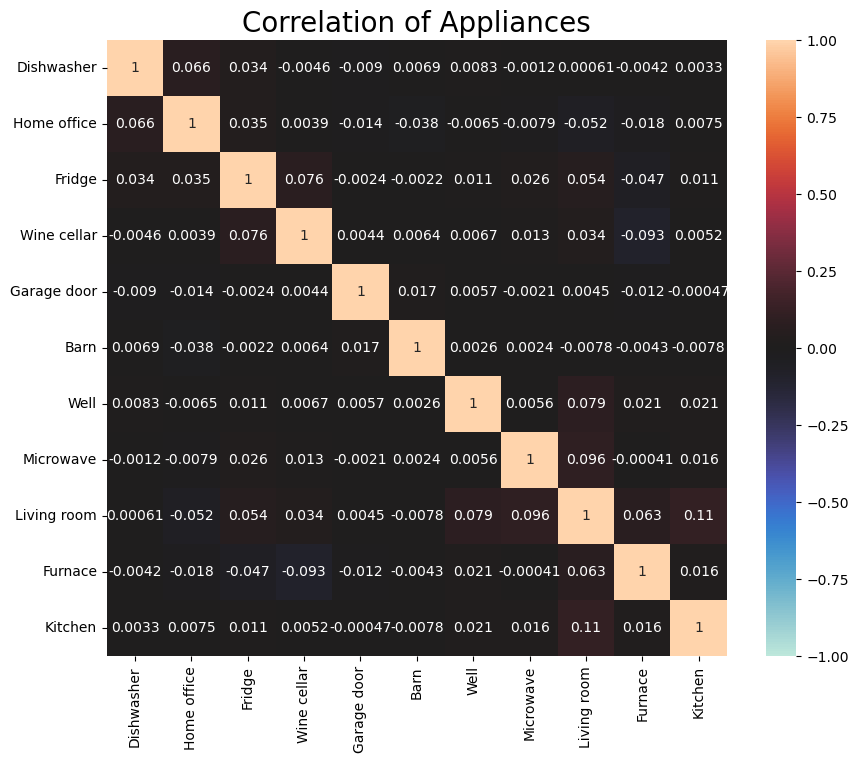

In [39]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = df[['Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

><div class="alert alert-success" role="alert">
>Some weather information is correlated each other.
><ul>
><li><b>Temperature</b> is related to <u>apparentTemperature and dewPoint</u>.</li>
><li><b>Humidity</b> is related to <u>visibility, windSpeed, cloudCover and dewPoint</u>.</li>
><li><b>Visibility</b> is related to <u>humidity, windSpeed, cloudCover and precipIntensity</u>.</li>
><li><b>CloudCover</b> is related to <u>humidity, visibility and precipIntensity</u>.</li>
><li><b>PrecipIntensity</b> is related to <u>visibility and cloudCover</u>.</li>
><li><b>DewPoint</b> is related to <u>temperature, apparentTemperature and humidity</u>.</li>
></ul>
></div>

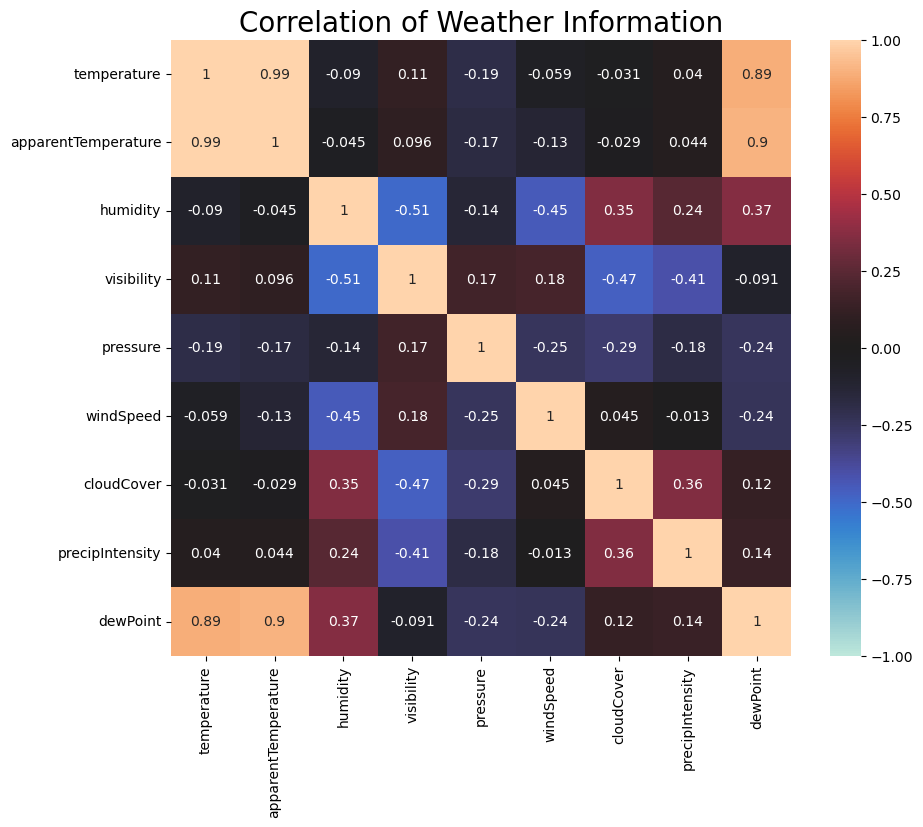

In [40]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = df[['temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information',size=20)
plt.show()

><div class="alert alert-success" role="alert">
>Some appliances are affected by weather information.
><ul>
><li><b>Fridge</b> is related to <u>temperature, apparentTemperature and dewPoint</u>.</li>
><li><b>Wine cellar</b> is related to <u>temperature, apparentTemperature and dewPoint</u>.</li>
><li><b>Furnace</b> is related to <u>temperature, apparentTemperature, windSpeed and dewPoint</u>.</li>
></ul>
></div>

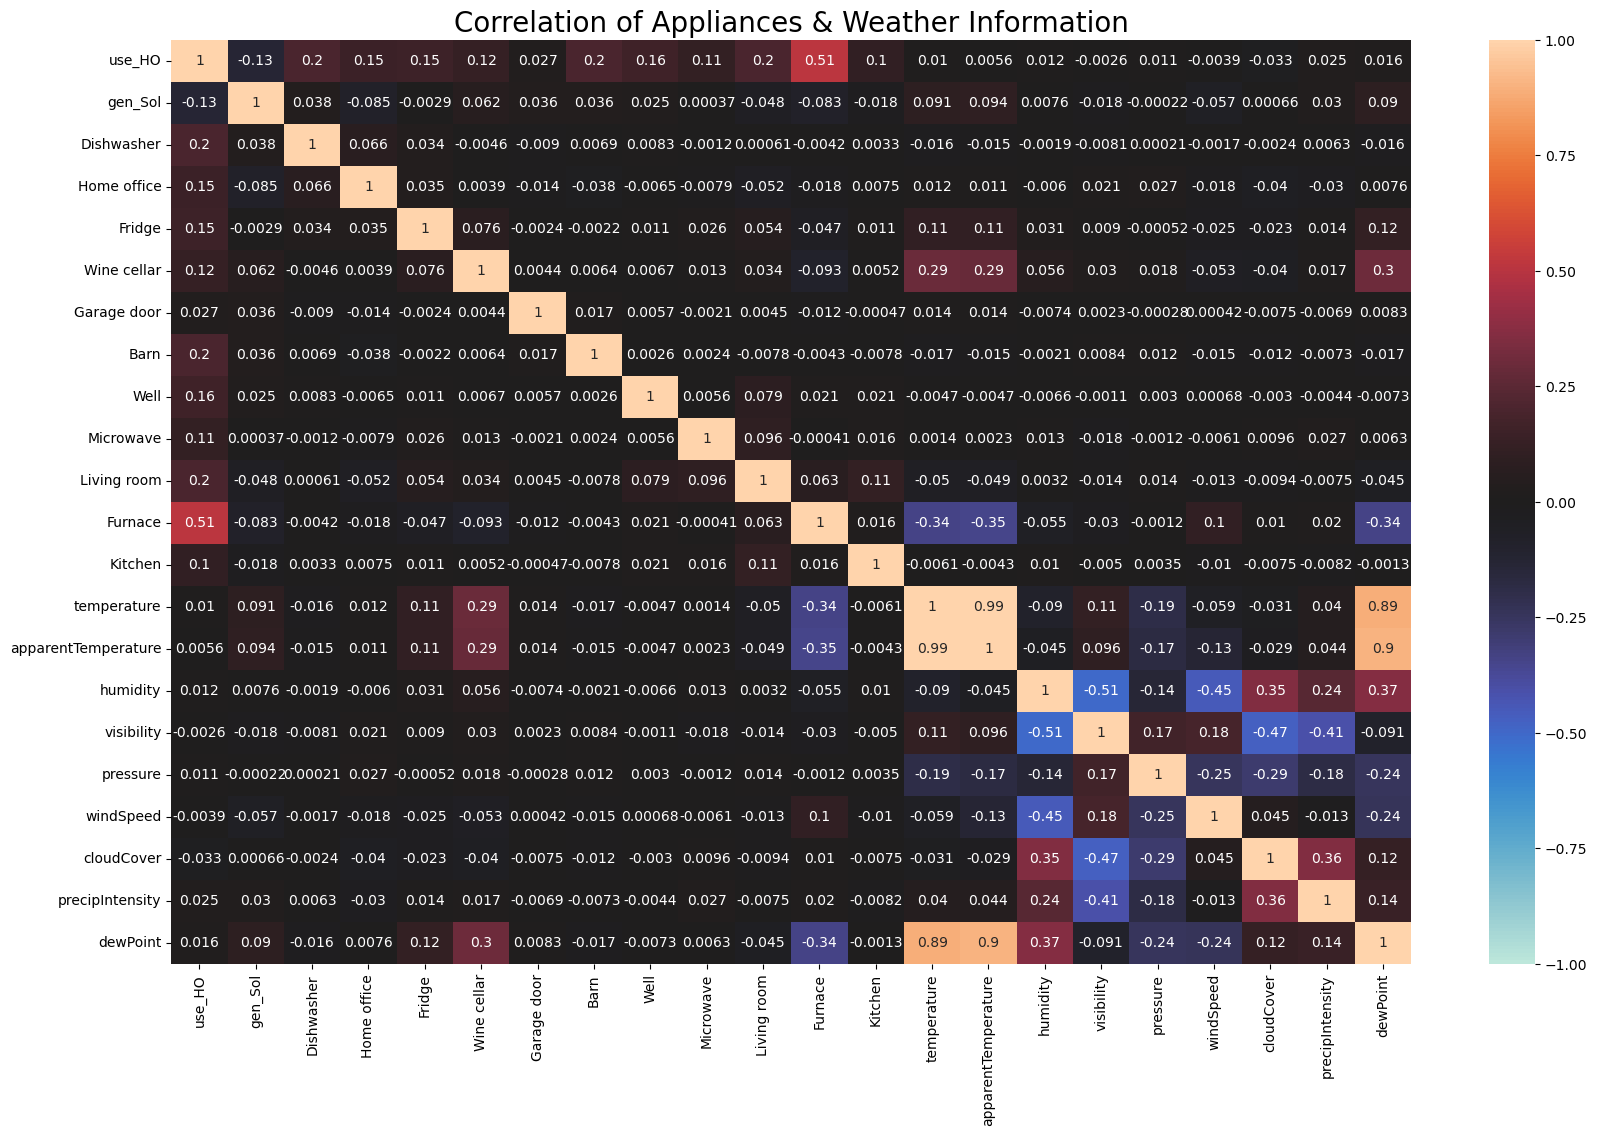

In [41]:
fig,ax = plt.subplots(figsize=(20, 12)) 
corr = df[['use_HO','gen_Sol','Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen',\
           'temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances & Weather Information',size=20)
plt.show()

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 6. Modeling
><div class="alert alert-success" role="alert">
>Looking at the data, I came up with two cases of analysis:
><ul>
><li><b><a href='#case1'>Case1 Change Detection</a></b> : Detecting excessive energy consumption in advance and preventing increase in usage fees.</li>
><li><b><a href='#case2'>Case2 Predict Future Consumption</a></b> : Predicting future energy consumption and generation by utilizing weather information and optimizing energy supply.</li>
></ul>
></div>

## Case1. Detect Changes in Energy Consumption<a id='case1'></a>
><div class="alert alert-success" role="alert">
><ul>
    ><li>It seems that it is possible to catch change points in the usage tendency of energy consumption from the data of energy consumption.</li>
    ><li>By capturing changes in consumption trends, it may be possible to think out <u>ways to increase energy supply in months when consumption is likely to increase and decrease it in months when consumption is likely to decrease</u>.</li>
    ></ul>
></div>

### Model1. ChangeFinder

#### What is Change Points?
><div class="alert alert-info" role="alert">
><ul>
><li>The change point is the point at which the trends in time series data change over time.</li>
><li>Outliers indicate <u>a momentary abnormal condition</u> (rapid decrease or increase), while change points mean that <u>the abnormal condition does not return to its original state and continue</u>.</li>
></ul>
></div>

#### ChangeFinder Overview
><div class="alert alert-info" role="alert">
><ul>
><li>ChangeFinder is an algorithm used to detect change points.</li>
><li>ChangeFinder uses the log-likelihood based on the <b><a href='http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=7E9892E5F694F20F0C55340E395E4AD0?doi=10.1.1.12.3469&rep=rep1&type=pdf'>SDAR</a>(Sequencially Discounting AR)</b> algorithm to calculate the change score.</li>
><li>SDAR algorithm introduces a <b>discounting parameter</b> into the AR algorithm to <u>reduce the influence of past data</u>, so that even <u>non-stationary time series data can be learned robustly</u>.</li>
></ul>
>ChangeFinder has two steps of model training:
><h5>Training STEP1</h5>
><ol>
><li>Train a time series model at each data point using the SDAR algorithm</li>
><li>Based on the trained time series model, calculate the likelihood that the data points at the next time point will appear</li>
><li>Calculate the logarithmic loss and use it as an <b>outlier score</b></li>
>    $$Score(x_t)=−logP_{t−1}(x_t|x_1,x_2,…,x_{t−1})$$
></ol>
><h5>Smoothing Step</h5>
><ul>
><li>Smooth the outlier score within the smoothing window($W$).</li>
><li>By smoothing, the score due to outliers is attenuated, and it is possible to <u>determine whether the abnormal condition has continued for a long time</u>.</li>
>    $$Score\_smoothed(x_t)=\frac{1}{W}\sum_{t=t−W+1}^{t}Score(x_i)$$
></ul>
><h5>Training STEP2</h5>
><ol>
><li>Using the score obtained by smoothing, train the model with the SDAR algorithm</li>
><li>Based on the trained time series model, calculate the likelihood that the data points at the next time point will appear</li>
><li>Calculate the logarithmic loss and use it as an <b>change score</b></li>
></ol>
></div>

#### Hyperparameter Tuning
><div class="alert alert-info" role="alert">
>In this notebook, we use python-based changefinder library. For detail, please refer to <a href='http://argmax.jp/index.php?changefinder'>the official manual(Ja)</a>.
><ul>
><li>Discounting parameter  $r(0< r < 1)$ :  The smaller this value, <u>the greater the influence of the past data points and the greater the variation in the change score</u></li>
><li>Order parameter for AR  $order$ :  How far past data points are included in the model</li>
><li>Smoothing window  $smooth$ : The greater this parameter is, <u>the easier it is to capture the essential changes rather than the outliers</u>, but if it is too large, it will be difficult to capture the changes themselves</li>
></ul>
></div>

In [42]:
def chng_detection(col, _r=0.01, _order=1, _smooth=10):
    cf = changefinder.ChangeFinder(r=_r, order=_order, smooth=_smooth)
    ch_df = pd.DataFrame()
    ch_df[col] = df[col].resample('D').mean()
    # calculate the change score
    ch_df['change_score'] = [cf.update(i) for i in ch_df[col]]
    ch_score_q1 = stats.scoreatpercentile(ch_df['change_score'], 25) 
    ch_score_q3 = stats.scoreatpercentile(ch_df['change_score'], 75) 
    thr_upper = ch_score_q3 + (ch_score_q3 - ch_score_q1) * 3
    
    anom_score = hv.Curve(ch_df['change_score'])
    anom_score_th = hv.HLine(thr_upper).opts(color='red', line_dash="dotdash")
    
    anom_points = [[ch_df.index[i],ch_df[col][i]] for i, score in enumerate(ch_df["change_score"]) if score > thr_upper]
    org = hv.Curve(ch_df[col],label=col).opts(yformatter='%.1fkw')
    detected = hv.Points(anom_points, label=f"{col} detected").opts(color='red', legend_position='bottom', size=5)

    return ((anom_score * anom_score_th).opts(title=f"{col} Change Score & Threshold") + \
            (org * detected).opts(title=f"{col} Detected Points")).opts(opts.Curve(width=800, height=300, show_grid=True, tools=['hover'])).cols(1)

><div class="alert alert-success" role="alert">
>Build a model to detect change points in energy consumption.
><ul>
><li>It can be seen that the change points in <b>July(rapid increase)</b> and <b>September(rapid decrease)</b>, when the data trend changes, are captured.</li>
></ul>

In [43]:
chng_detection('use_HO', _r=0.001, _order=1, _smooth=3)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

:Layout
   .Overlay.I  :Overlay
      .Curve.I :Curve   [time]   (change_score)
      .HLine.I :HLine   [x,y]
   .Overlay.II :Overlay
      .Curve.Use_HO           :Curve   [time]   (use_HO)
      .Points.Use_HO_detected :Points   [x,y]

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Case2. Predict Future Energy Consumption<a id='case2'></a>
><div class="alert alert-success" role="alert">
><ul>
    ><li>It is considered possible to predict the energy consumption of each appliance from the weather information.</li>
    ><li>By predicting energy consumption, it is possible to <u>estimate the amount of required energy supply based on the weather information</u>, which can lead to the <b>energy optimization</b>.</li>
    ><li>I built three models, <a href='#var'>VAR</a>, <a href='#prf'>Prophet</a> and <a href='#lgbm'>LightGBM</a>.</li>
></ul>
></div>

### Model1. VAR<a id='var'></a>
><div class="alert alert-info" role="alert">
><ul>
><li>The vector autoregressive (VAR) model is a <b>multivariate extension</b> of the autoregressive (AR) model.</li>
><li>By using the VAR model, it is possible to do predictions using multiple variables, and it is expected that <u>the prediction accuracy will be improved compared to predictions using a single variable</u>.</li>
><li>$VAR(p)$ is formulated as follows: </li>
>$$y_t=c+Φ_1y_{t−1}+⋯+Φ_py_{t−p}+ϵ_t, ϵ_t∼W.N.(Σ)$$
></ul>
></div>

#### Granger Causality Test
><div class="alert alert-success" role="alert">
><ul>
><li>The <b>Granger Causality Test</b> examines the causal relationship between variables from time series data.</li>
><li>If we compare future x predictions <u>based solely on current and past x values</u> with future x predictions <u>based on current and past x and y values</u>, and the latter MSE is smaller, then it is said that there is a Granger Causality from y to x.</li>
></ul>
></div>

In [44]:
def grangerTestPlot(weather_info, applicances, _maxlag):
    grangerTest_df = pd.DataFrame()
    for weather in weather_info:
        for appliance in applicances:
            test_result = grangercausalitytests(df[[appliance, weather]], maxlag=_maxlag, verbose=False)
            p_values = [round(test_result[i][0]['ssr_chi2test'][1],4) for i in range(1, _maxlag+1)]
            min_p_value = np.min(p_values)
            grangerTest_df.loc[appliance, weather] = min_p_value

    fig,ax = plt.subplots(figsize=(10, 8)) 
    sns.heatmap(grangerTest_df, vmax=1, vmin=0, center=1, annot=True)
    ax.set_title('Granger Causality Test Result',size=20)
    plt.xlabel("Weather Information",size=15)
    plt.ylabel("Energy Consumption",size=15)
    plt.show()

><div class="alert alert-success" role="alert">
><ul>
    ><li>I selected the energy consumption of the entire home and typical home appliance, and conducted a Granger Causality Test with weather information.</li>
    ><li>As a result of the Granger Causality Test, in the two selected energy consumption variables, <u>the P-value of pressure and visibility exceeded 5%</u>, and this means that no causality was observed between these pairs.</li>
    ></ul>
></div>

verbose is deprecated since functions should not print results


verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print results
verbose is deprecated since functions should not print 

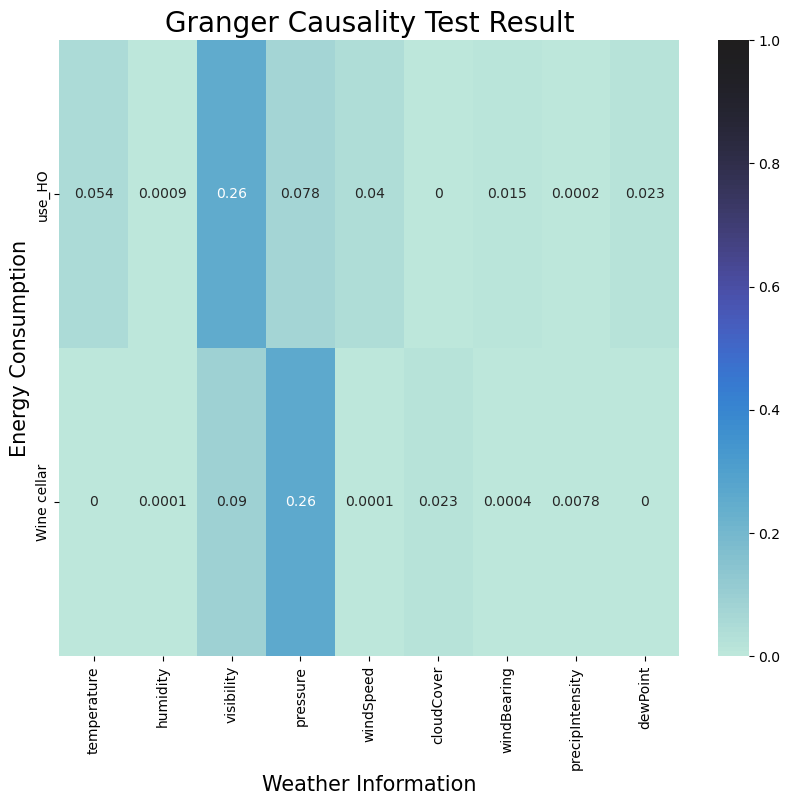

In [45]:
grangerTestPlot(
    weather_info=['temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint'], \
    applicances=['use_HO','Wine cellar'], \
    _maxlag=12)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

#### Stationarity Check
><div class="alert alert-success" role="alert">
>Stationarity is important for time-series modeling because many time-series modeling method require the data to be stationarity.<br/>
>Stationarity condition is:
><ul>
><li><b>The mean of the data is constant</b></li>
><li><b>The variance of the data is constant</b></li>
><li><b>The covariance of the data is constant</b></li>
></ul>
>For testing the stationarity, I used <b>Augmented Dickey-Fuller Test</b>. As a result of the ADF test, P-values of all variables are within 5%.
></div>

In [46]:
for i in ['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint','use_HO','Wine cellar']:
    print(f"p-value {i} : {adfuller(df[i].resample('H').mean(), autolag='AIC', regression = 'ct')[1]}")

p-value temperature : 0.04494818919529195
p-value humidity : 1.7086334129374748e-16
p-value windSpeed : 5.282063043493019e-22
p-value cloudCover : 6.50799476352744e-18


p-value windBearing : 5.792427232680091e-22
p-value precipIntensity : 0.0
p-value dewPoint : 0.00014665014475127925
p-value use_HO : 1.6074072267315664e-12
p-value Wine cellar : 0.00028287568084467245


#### VAR Modeling
><div class="alert alert-success" role="alert">
><ul>
    ><li>The figure below shows the forecast results of <b>total energy consumption</b> and <b>wine cellar energy consumption</b> with weather information added to the explanatory variables.</li>
    ><li>Both of them seem to be generally well predicted <b>in a very short period</b> of time.</li>
></ul>
></div>

In [50]:
var_df = df.resample('H').mean()
def var_train(cols=['temperature', 'humidity', 'visibility',  'windSpeed', 'windBearing', 'dewPoint','Furnace', 'use_HO'], max_order=10, train_ratio=0.9,test_ratio=0.1):
    #make dataframe for training
    tr,te = [int(len(var_df) * i) for i in [train_ratio, test_ratio]]
    train, test = var_df[0:tr], var_df[tr:]
    #model training
    var_func = VAR(train[cols], freq='H')
    var_func.select_order(max_order)
    model = var_func.fit(maxlags=max_order, ic='aic', trend='ct')
    model_result = model.summary()
    #make predict dataframe
    varForecast_df = pd.DataFrame(model.forecast(model.endog, steps=len(test)),columns=cols)
    varForecast_df.index = test.index
    
    return varForecast_df, model_result

TypeError: agg function failed [how->mean,dtype->object]

In [48]:
varForecast_df, model_result = var_train(cols=['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint','use_HO','Wine cellar'], \
                                         max_order=48, train_ratio=0.99,test_ratio=0.01)
#evaluation with MAE
var_use_mae = mean_absolute_error(var_df['use_HO'][-len(varForecast_df):], varForecast_df['use_HO'])
((hv.Curve(var_df['use_HO'], label='use_HO').opts(color='blue')\
  * hv.Curve(varForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='VAR Result - Total Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(var_df['use_HO'][-int(len(var_df)*0.05):], label='use_HO').opts(color='blue') \
  * hv.Curve(varForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='VAR Result Enlarged - Total Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

NameError: name 'var_train' is not defined

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

In [ ]:
#evaluation with MAE
var_wine_mae = mean_absolute_error(var_df['Wine cellar'][-len(varForecast_df):], varForecast_df['Wine cellar'])
((hv.Curve(var_df['Wine cellar'], label='Wine cellar').opts(color='blue')\
  * hv.Curve(varForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='VAR Result - Wine Cellar Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(var_df['Wine cellar'][-int(len(var_df)*0.05):], label='Wine Cellar').opts(color='blue') \
  * hv.Curve(varForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='VAR Result Enlarged - Wine Cellar Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

>Output Model Training Summary

In [ ]:
print(model_result)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Model2. Prophet<a id='prf'></a>
><div class="alert alert-info" role="alert">
><ul>
    ><li>Building a time-series forecasting model with Prophet, we can predict future energy consumption.</li>
    ><li>By adding weather information as regressors, the influence of weather can be taken into consideration in the prediction.</li>
></ul>
></div>

In [ ]:
prf_df = df.resample('H').mean()
def prophet_train(train_ratio=0.99, test_ratio=0.01, trg='use_HO', regressors=['temperature', 'humidity']):
    #make dataframe for training
    tr,te = [int(len(prf_df) * i) for i in [train_ratio, test_ratio]]
    train, test = prf_df[0:tr], prf_df[tr:]
    prophet_df = pd.DataFrame()
    prophet_df["ds"] = train.index
    prophet_df['y'] = train[trg].values
    #add regressors
    for i in regressors:
        prophet_df[i] = train[i].values

    #train model by Prophet
    m = Prophet()
    #include additional regressors into the model
    for i in regressors:
        m.add_regressor(i)
    m.fit(prophet_df)

    #make dataframe for prediction
    future = pd.DataFrame()
    future['ds'] = test.index
    #add regressors
    for i in regressors:
        future[i] = test[i].values

    #predict the future
    prophe_result = m.predict(future)
    prfForecast_df = pd.DataFrame()
    prfForecast_df[trg] = prophe_result.yhat
    prfForecast_df.index = prophe_result.ds
    
    return prfForecast_df

><div class="alert alert-success" role="alert">
><ul>
    ><li>The total energy consumption seems to be roughly predictable, but the energy consumption of the wine cellar is only slightly predictable.</li>
></ul>
></div>

In [ ]:
prfForecast_df = prophet_train(trg='use_HO',regressors=['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint'])
#evaluation with MAE
prf_use_mae = mean_absolute_error(prf_df['use_HO'][-len(prfForecast_df):], prfForecast_df['use_HO'])
((hv.Curve(prf_df['use_HO'], label='use_HO').opts(color='blue')\
  * hv.Curve(prfForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='Prophet Result - Total Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(prf_df['use_HO'][-int(len(var_df)*0.05):], label='use_HO').opts(color='blue') \
  * hv.Curve(prfForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='Prophet Result Enlarged - Total Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

In [ ]:
prfForecast_df = prophet_train(trg='Wine cellar',regressors=['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint'])
#evaluation with MAE
prf_wine_mae = mean_absolute_error(prf_df['Wine cellar'][-len(prfForecast_df):], prfForecast_df['Wine cellar'])
((hv.Curve(prf_df['Wine cellar'], label='Wine cellar').opts(color='blue')\
  * hv.Curve(prfForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='Prophet Result - Wine cellar Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(prf_df['Wine cellar'][-int(len(var_df)*0.05):], label='Wine cellar').opts(color='blue') \
  * hv.Curve(prfForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='Prophet Result Enlarged - Wine cellar Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Model3. LightGBM Regressor<a id='lgbm'></a>
><div class="alert alert-info" role="alert">
><ul>
    ><li>Building a time-series regression model with LightGBM, we can predict future energy consumption and understand the relationship between energy consumption and weather information.</li>
></ul>
></div>

#### Feature Engineering

In [ ]:
_lgbm_df = df.resample('H').mean()
_lgbm_df['weekday'] =   LabelEncoder().fit_transform(pd.Series(_lgbm_df.index).apply(lambda x : x.day_name())).astype(np.int8)
_lgbm_df['timing'] = LabelEncoder().fit_transform(_lgbm_df['hour'].apply(hours2timing)).astype(np.int8)

In [ ]:
def lgbm_train(cols=['temperature','dewPoint','use_HO'],trg='use_HO',train_ratio=0.8,valid_ratio=0.1,test_ratio=0.1):
    #make dataframe for training
    lgbm_df = _lgbm_df[cols]
    tr,vd,te = [int(len(lgbm_df) * i) for i in [train_ratio, valid_ratio, test_ratio]]
    X_train, Y_train = lgbm_df[0:tr].drop([trg], axis=1), lgbm_df[0:tr][trg]
    X_valid, Y_valid = lgbm_df[tr:tr+vd].drop([trg], axis=1), lgbm_df[tr:tr+vd][trg]
    X_test = lgbm_df[tr+vd:tr+vd+te+2].drop([trg], axis=1)
    lgb_train = lgb.Dataset(X_train, Y_train)
    lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)
    #model training
    params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'mse'},
        'num_leaves':200,
        'drop_rate':0.05,
        'learning_rate':0.1,
        'seed':0,
        'feature_fraction':1.0,
        'bagging_fraction':1.0,
        'bagging_freq':0,
        'min_child_samples':5
    }
    gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_valid], early_stopping_rounds=100)
    #make predict dataframe
    pre_df = pd.DataFrame()
    pre_df[trg] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    pre_df.index = lgbm_df.index[tr+vd:tr+vd+te+2]
    return pre_df, gbm, X_train

In [ ]:
lgbmForecast_df, model, x_train = lgbm_train(\
                cols=['temperature', 'humidity', 'visibility', 'apparentTemperature',\
                       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',\
                       'dewPoint', 'precipProbability','year', 'month','day', 'weekday', 'weekofyear', \
                        'hour', 'timing','use_HO'],\
                trg='use_HO',train_ratio=0.9,valid_ratio=0.09,test_ratio=0.01)
#calculate SHAP value for model interpretation
explainer = shap.TreeExplainer(model=model,feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X=x_train)

><div class="alert alert-success" role="alert">
><ul>
    ><li>The prediction of the total energy consumption seems to be more accurate than the result of the Prophet model.</li>
    ><li>The time information such as <b>'weekday'</b> and <b>'timing'</b> that was <u>not included in the Prophet model</u> may be effective.</li>
    ><li>Looking at the feature analysis of SHAP, it is thought that <u>positive changes</u> in features such as <b>'weekofyear'</b>, <b>'timing'</b>, <b>'hour'</b>, <b>'dewPoint'</b> and <b>'temperature'</b> and <u>negative changes</u> in features such as <b>'weekday'</b> and <b>'cloudCover'</b> <u>affect the increase in the total energy consumption</u>.</li>
></ul>
></div>

In [ ]:
#evaluation with MAE
lgbm_use_mae = mean_absolute_error(_lgbm_df['use_HO'][-len(lgbmForecast_df):], lgbmForecast_df['use_HO'])
((hv.Curve(_lgbm_df['use_HO'], label='use_HO').opts(color='blue')\
  * hv.Curve(lgbmForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='LightGBM Result - Total Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(_lgbm_df['use_HO'][-int(len(_lgbm_df)*0.05):], label='use_HO').opts(color='blue') \
  * hv.Curve(lgbmForecast_df['use_HO'], label='use_HO predicted').opts(color='red', title='LightGBM Result Enlarged - Total Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

In [ ]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=x_train, feature_names=x_train.columns)

In [ ]:
shap.summary_plot(shap_values=shap_values, features=x_train, feature_names=x_train.columns, plot_type="violin")

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

In [ ]:
lgbmForecast_df, model, x_train = lgbm_train(\
                cols=['temperature', 'humidity', 'visibility', 'apparentTemperature',\
                       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',\
                       'dewPoint', 'precipProbability','year', 'month','day', 'weekday', 'weekofyear', \
                        'hour', 'timing','Wine cellar'],\
                trg='Wine cellar',train_ratio=0.9,valid_ratio=0.09,test_ratio=0.01)
#calculate SHAP value for model interpretation
explainer = shap.TreeExplainer(model=model,feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X=x_train)

><div class="alert alert-success" role="alert">
><ul>
    ><li>The prediction of the Wine Cellar energy consumption seems to be more accurate than the result of the Prophet model.</li>
    ><li>The time information such as <b>'weekofyear'</b> and <b>'hour'</b> that was <u>not included in the Prophet model</u> may be effective.</li>
    ><li>Looking at the feature analysis of SHAP, it is thought that <u>positive changes</u> in features such as <b>'weekofyear'</b>, <b>'hour'</b>, <b>'dewPoint'</b> and <b>'windSpeed'</b> and <u>negative changes</u> in features such as <b>'humidity'</b> and <b>'cloudCover'</b> <u>affect the increase in the Wine Cellar energy consumption</u>.</li>
></ul>
></div>

In [ ]:
#evaluation with MAE
lgbm_wine_mae = mean_absolute_error(_lgbm_df['Wine cellar'][-len(lgbmForecast_df):], lgbmForecast_df['Wine cellar'])
((hv.Curve(_lgbm_df['Wine cellar'], label='Wine cellar').opts(color='blue')\
  * hv.Curve(lgbmForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='LightGBM Result - Wine cellar Energy Consumption')).opts(legend_position='bottom') + \
 (hv.Curve(_lgbm_df['Wine cellar'][-int(len(_lgbm_df)*0.05):], label='use_HO').opts(color='blue') \
  * hv.Curve(lgbmForecast_df['Wine cellar'], label='Wine cellar predicted').opts(color='red', title='LightGBM Result Enlarged - Wine cellar Energy Consumption')).opts(legend_position='bottom'))\
    .opts(opts.Curve(xlabel="Time", yformatter='%.2fkw', width=800, height=300, show_grid=True, tools=['hover'])).opts(shared_axes=False).cols(1)

In [ ]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=x_train, feature_names=x_train.columns)

In [ ]:
shap.summary_plot(shap_values=shap_values, features=x_train, feature_names=x_train.columns, plot_type="violin")

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Model Comparison
><div class="alert alert-success" role="alert">
>Comparison of models we built above by evaluating with MAE(Mean Absolute Error).
>$$MAE = \frac{1}{n}\sum_{i}^{n}|yobs_{i}−ypred_{i}|$$
><ul>
    ><li>Prophet and Light GBM models far outperform VAR models.</li>
    ><li>This difference in performance is thought to be due to the fact that the two models were able to use <u>weather information and time information as regression features</u> during prediction.</li>
    ><li>The problem with these two models is that <u>when you want to predict future energy consumption, you need to use the weather information that is predicted for convenience</u>.</li>
></ul>
></div>

In [ ]:
display(HTML('<h3>Evaluation - MAE</h3>'+tabulate([['Total Energy Consumption',var_use_mae,prf_use_mae,lgbm_use_mae],['Wine cellar Energy Consumption',var_wine_mae,prf_wine_mae,lgbm_wine_mae]],\
                      ["Target", "VAR", "Prophet","LightGBM Regressor"], tablefmt="html")))

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 7. Conclusion
><div class="alert alert-success" role="alert">
><ul>
    ><li>There is a certain trend in the amount of energy consumed by each home appliances.</li>
    ><li>The ChangeFinder model we created caught trend changes in energy consumption <u>at an early stage</u>.</li>
    ><li>It turns out that models built with <b>Prophet and LightGBM</b> can predict future energy consumption.</li>
    ><li>It was also found that <u>weather information and time information are very useful</u> for the prediction.</li>
></ul>
></div>

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 8. References
> * **Very good data understanding & EDA & time-series modeling**  
> https://www.kaggle.com/malekzadeh/smart-home-data-processing-weather-vs-energy
> * **ChangeFinder Library Usage (Japanese)**  
> http://argmax.jp/index.php?changefinder
> * **Change Detection using SDAR Algorithm paper**  
> http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=7E9892E5F694F20F0C55340E395E4AD0?doi=10.1.1.12.3469&rep=rep1&type=pdf
> * **VAR model library reference**  
> https://www.statsmodels.org/dev/vector_ar.html
> * **Granger Causality Test Library Usage**  
> https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html
> * **Prophet How to add Regressors**  
> https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
> * **A Unified Approach to Interpreting Model Predictions (SHAP original paper)**  
> http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf
> * **Consistent Individualized Feature Attribution for Tree Ensembles (SHAP vs popular feature attribution methods)**  
> https://arxiv.org/pdf/1802.03888.pdf
> * **SHAP Library Usage**  
> https://shap.readthedocs.io/en/latest/api.html
> * **SHAP Overview (Japanese)**  
> https://speakerdeck.com/dropout009/shapley-additive-explanationsdeji-jie-xue-xi-moderuwojie-shi-suru
> * **SHAP with LightGBM post (Japanese)**  
> https://blog.amedama.jp/entry/shap-lightgbm
> * **Interpretability in Machine Learning**  
> https://christophm.github.io/interpretable-ml-book/

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>